In [17]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import mlxp as mlxpy
import numpy as np
import pdb

In [18]:
def save(n, ext='.pdf', save_figs=True,dirname = 'figures', **kwargs):
    if save_figs==True:
        kwargs.setdefault('bbox_inches', 'tight')
        kwargs.setdefault('pad_inches', 0.1)
        kwargs.setdefault('transparent', True)
        plt.savefig(os.path.join(dirname, n + ext), **kwargs)
        

def make_plot_dicts(methods,key_name):
    
    labels = {m: key_name +' ' +m  for m in methods}
    colors = sns.color_palette("colorblind", n_colors=len(methods), desat=.7)
    sns.palplot(colors)
    color_dict_index = {m:i for i,m in enumerate(methods)}
    color_dict = {key:colors[value] for key,value in color_dict_index.items()}
    linestyles = {m:'-' for m in methods}
    return color_dict,labels,linestyles, colors

In [19]:
root = '../../data/outputs'
parent_log_dir = os.path.join(root,'cartpole')
reader = mlxpy.Reader(parent_log_dir, reload=False)

query = "info.status == 'COMPLETE'"

results = reader.filter(query_string=query)




In [69]:
results.keys()

['config.agent_type',
 'config.alpha',
 'config.batch_size',
 'config.ckpt_frequency',
 'config.discount',
 'config.dual_lr',
 'config.env_name',
 'config.eps',
 'config.eval_frequency',
 'config.hard',
 'config.hidden_dim',
 'config.init_steps',
 'config.inner_lr',
 'config.log_frequency',
 'config.lr',
 'config.model_hidden_dim',
 'config.no_double',
 'config.no_learn_reward',
 'config.no_warm',
 'config.num_Q_steps',
 'config.num_T_steps',
 'config.num_dual_Q_steps',
 'config.num_ensemble_vep',
 'config.num_train_steps',
 'config.prob_model',
 'config.save_agent',
 'config.save_buf',
 'config.seed',
 'config.tau',
 'config.warm_opt',
 'config.with_inv_jac',
 'eval.episode',
 'eval.episode_return',
 'eval.step',
 'eval.time',
 'info.current_file_path',
 'info.end_date',
 'info.end_time',
 'info.executable',
 'info.hostname',
 'info.logger.artifacts_dir',
 'info.logger.log_dir',
 'info.logger.log_id',
 'info.logger.metadata_dir',
 'info.logger.metrics_dir',
 'info.process_id',
 'info.

In [21]:
from mlxp.data_structures.contrib.aggregation_maps import AvgStd

group_keys = ['config.agent_type', 'config.inner_lr', 'config.tau']
grouped_results = results.groupBy(group_keys)
agg_maps = [AvgStd('eval.episode_return'),AvgStd('eval.step')]
agg_results = grouped_results.aggregate(agg_maps)
#print(agg_results)


In [89]:
def mean_std_array(arrays, keys, end_index=0):
    out = {}
    first = True
    for el in arrays:
        for key in keys:
            import pdb 
            
            data = np.array(el[key][end_index:])
            
            #pdb.set_trace()
            if first:
                out[key+'_avg'] = data
                out[key+'_std'] = data**2
            else:
                out[key+'_avg'] += data
                out[key+'_std'] += data**2                
        first=False
    for key in keys:
        out[key+'_avg'] = out[key+'_avg']/len(arrays)
        out[key+'_std'] = out[key+'_std']/len(arrays)
        out[key+'_std'] = out[key+'_std'] - out[key+'_avg']**2
        out[key+'_std'] = np.sqrt(out[key+'_std'])
    return out
    
def mean_std(results,keys, end_index=0):
    out = {}
    for key, value in results.items():
        new_values = mean_std_array(value, keys, end_index=end_index)
        out[key] = new_values
    return out

def find_best(results, field, groups_idx):
    best_key = {}
    best_value = {}
    
    for key,value in results.items():
        group = key[groups_idx]
        cur_value = np.mean(value[field])
        if group not in best_value or cur_value > best_value[group]:
            best_value[group]= cur_value
            best_key[group] = key
    return best_key

In [92]:
keys = ['eval.step', 'eval.episode_return']
#res = mean_std(grouped_results, keys, end_index=-201)

train_keys = ['train_returns.step', 'train_returns.episode_return']
train_res = mean_std(grouped_results, train_keys, end_index=-200)

best_keys = find_best(train_res, field='train_returns.episode_return_avg', groups_idx=0)

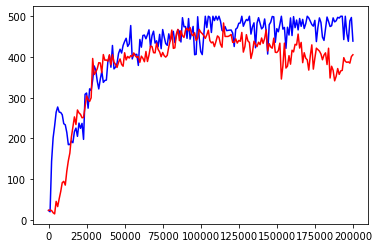

In [94]:
colors  ={'omd': 'red',
          'funcBO':'blue'}


fig, ax = plt.subplots(1, 1, figsize=(6, 4))
#agg_results[0]['eval.episode_return_avg']

best_keys_list = [value for key,value in best_keys.items()]
for key, value  in res.items():
    if key in best_keys_list:
        ax.plot(value['eval.step_avg'], value['eval.episode_return_avg'], label = key, color=colors[key[0]])


#ax.plot_legend()


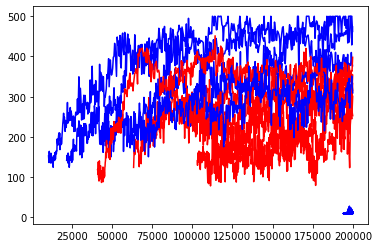

In [86]:
colors  ={'omd': 'red',
          'funcBO':'blue'}


fig, ax = plt.subplots(1, 1, figsize=(6, 4))
#agg_results[0]['eval.episode_return_avg']
for key, value  in train_res.items():
    ax.plot(value['train_returns.step_avg'], value['train_returns.episode_return_avg'], label = key, color=colors[key[0]])


In [93]:
best_keys

{'omd': ('omd', '0.0003', '0.01'), 'funcBO': ('funcBO', '0.003', '0.01')}

In [63]:
out[('omd', '0.003', '0.005')]

{'eval.stepavg': array([     0.,   1000.,   2000.,   3000.,   4000.,   5000.,   6000.,
          7000.,   8000.,   9000.,  10000.,  11000.,  12000.,  13000.,
         14000.,  15000.,  16000.,  17000.,  18000.,  19000.,  20000.,
         21000.,  22000.,  23000.,  24000.,  25000.,  26000.,  27000.,
         28000.,  29000.,  30000.,  31000.,  32000.,  33000.,  34000.,
         35000.,  36000.,  37000.,  38000.,  39000.,  40000.,  41000.,
         42000.,  43000.,  44000.,  45000.,  46000.,  47000.,  48000.,
         49000.,  50000.,  51000.,  52000.,  53000.,  54000.,  55000.,
         56000.,  57000.,  58000.,  59000.,  60000.,  61000.,  62000.,
         63000.,  64000.,  65000.,  66000.,  67000.,  68000.,  69000.,
         70000.,  71000.,  72000.,  73000.,  74000.,  75000.,  76000.,
         77000.,  78000.,  79000.,  80000.,  81000.,  82000.,  83000.,
         84000.,  85000.,  86000.,  87000.,  88000.,  89000.,  90000.,
         91000.,  92000.,  93000.,  94000.,  95000.,  96000.,